In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import json
from Actor_Graph import Actor_Graph

with open('tvshows.json', 'r') as f:
    tvshows = json.load(f)
    
# Get the first 8 shows
graph = Actor_Graph(tvshows[:8])

# Build the relations between actors
graph.build_relations()

# Display the actors
for actor in graph:
    print(actor)

Lena Dunham, shows: 139, influence: 1.0
Allison Williams, shows: 139, influence: 1.0
Jemima Kirke, shows: 139, influence: 1.0
Zosia Mamet, shows: 139, influence: 1.0
Adam Driver, shows: 139, influence: 1.0
Alex Karpovsky, shows: 139, influence: 1.0
Andrew Rannells, shows: 139, influence: 1.0
Ebon Moss-Bachrach, shows: 139, influence: 1.0
Bea Arthur, shows: 722, influence: 1.0
Betty White, shows: 722, influence: 1.0
Rue McClanahan, shows: 722, influence: 1.0
Estelle Getty, shows: 722, influence: 1.0
Christina Hendricks, shows: 23542, influence: 1.0
Manny Montana, shows: 23542, influence: 1.0
Reno Wilson, shows: 23542, influence: 1.0
Matthew Lillard, shows: 23542, influence: 1.0
Retta, shows: 23542, influence: 1.0
Mae Whitman, shows: 23542, influence: 1.0
Lidya Jewett, shows: 23542, influence: 1.0
Izzy Stannard, shows: 23542, influence: 1.0
Kristen Li, shows: 6771, influence: 1.0
Natalie Palamides, shows: 6771, influence: 1.0
Amanda Leighton, shows: 6771, influence: 1.0
Tom Kane, shows: 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

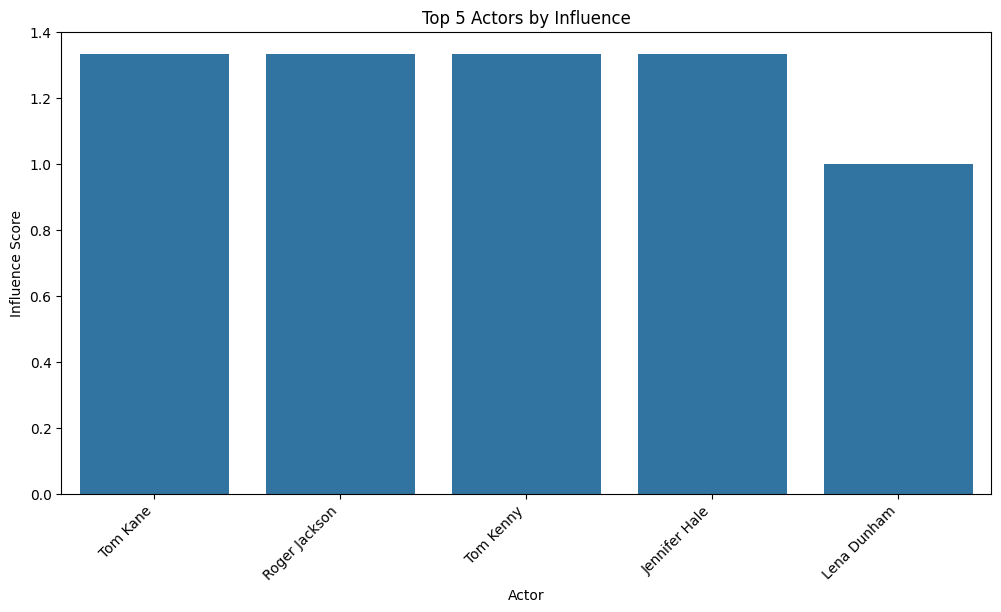

In [23]:
# Create a list of tuples containing actor names and their influence scores
actor_influences = [(actor.name, actor.compute_influence()) for actor in graph]

# Sort the list by influence score in descending order and take the top 5
top_5_actors = sorted(actor_influences, key=lambda x: x[1], reverse=True)[:5]

# Create a DataFrame from the top 10 actors
df = pd.DataFrame(top_5_actors, columns=['Actor', 'Influence'])

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Actor', y='Influence', data=df)
plt.title('Top 5 Actors by Influence')
plt.xlabel('Actor')
plt.ylabel('Influence Score')

# Rotate the labels so they dont collide with each other
plt.xticks(rotation=45, ha='right')
plt.show()


In [24]:
import networkx as nx

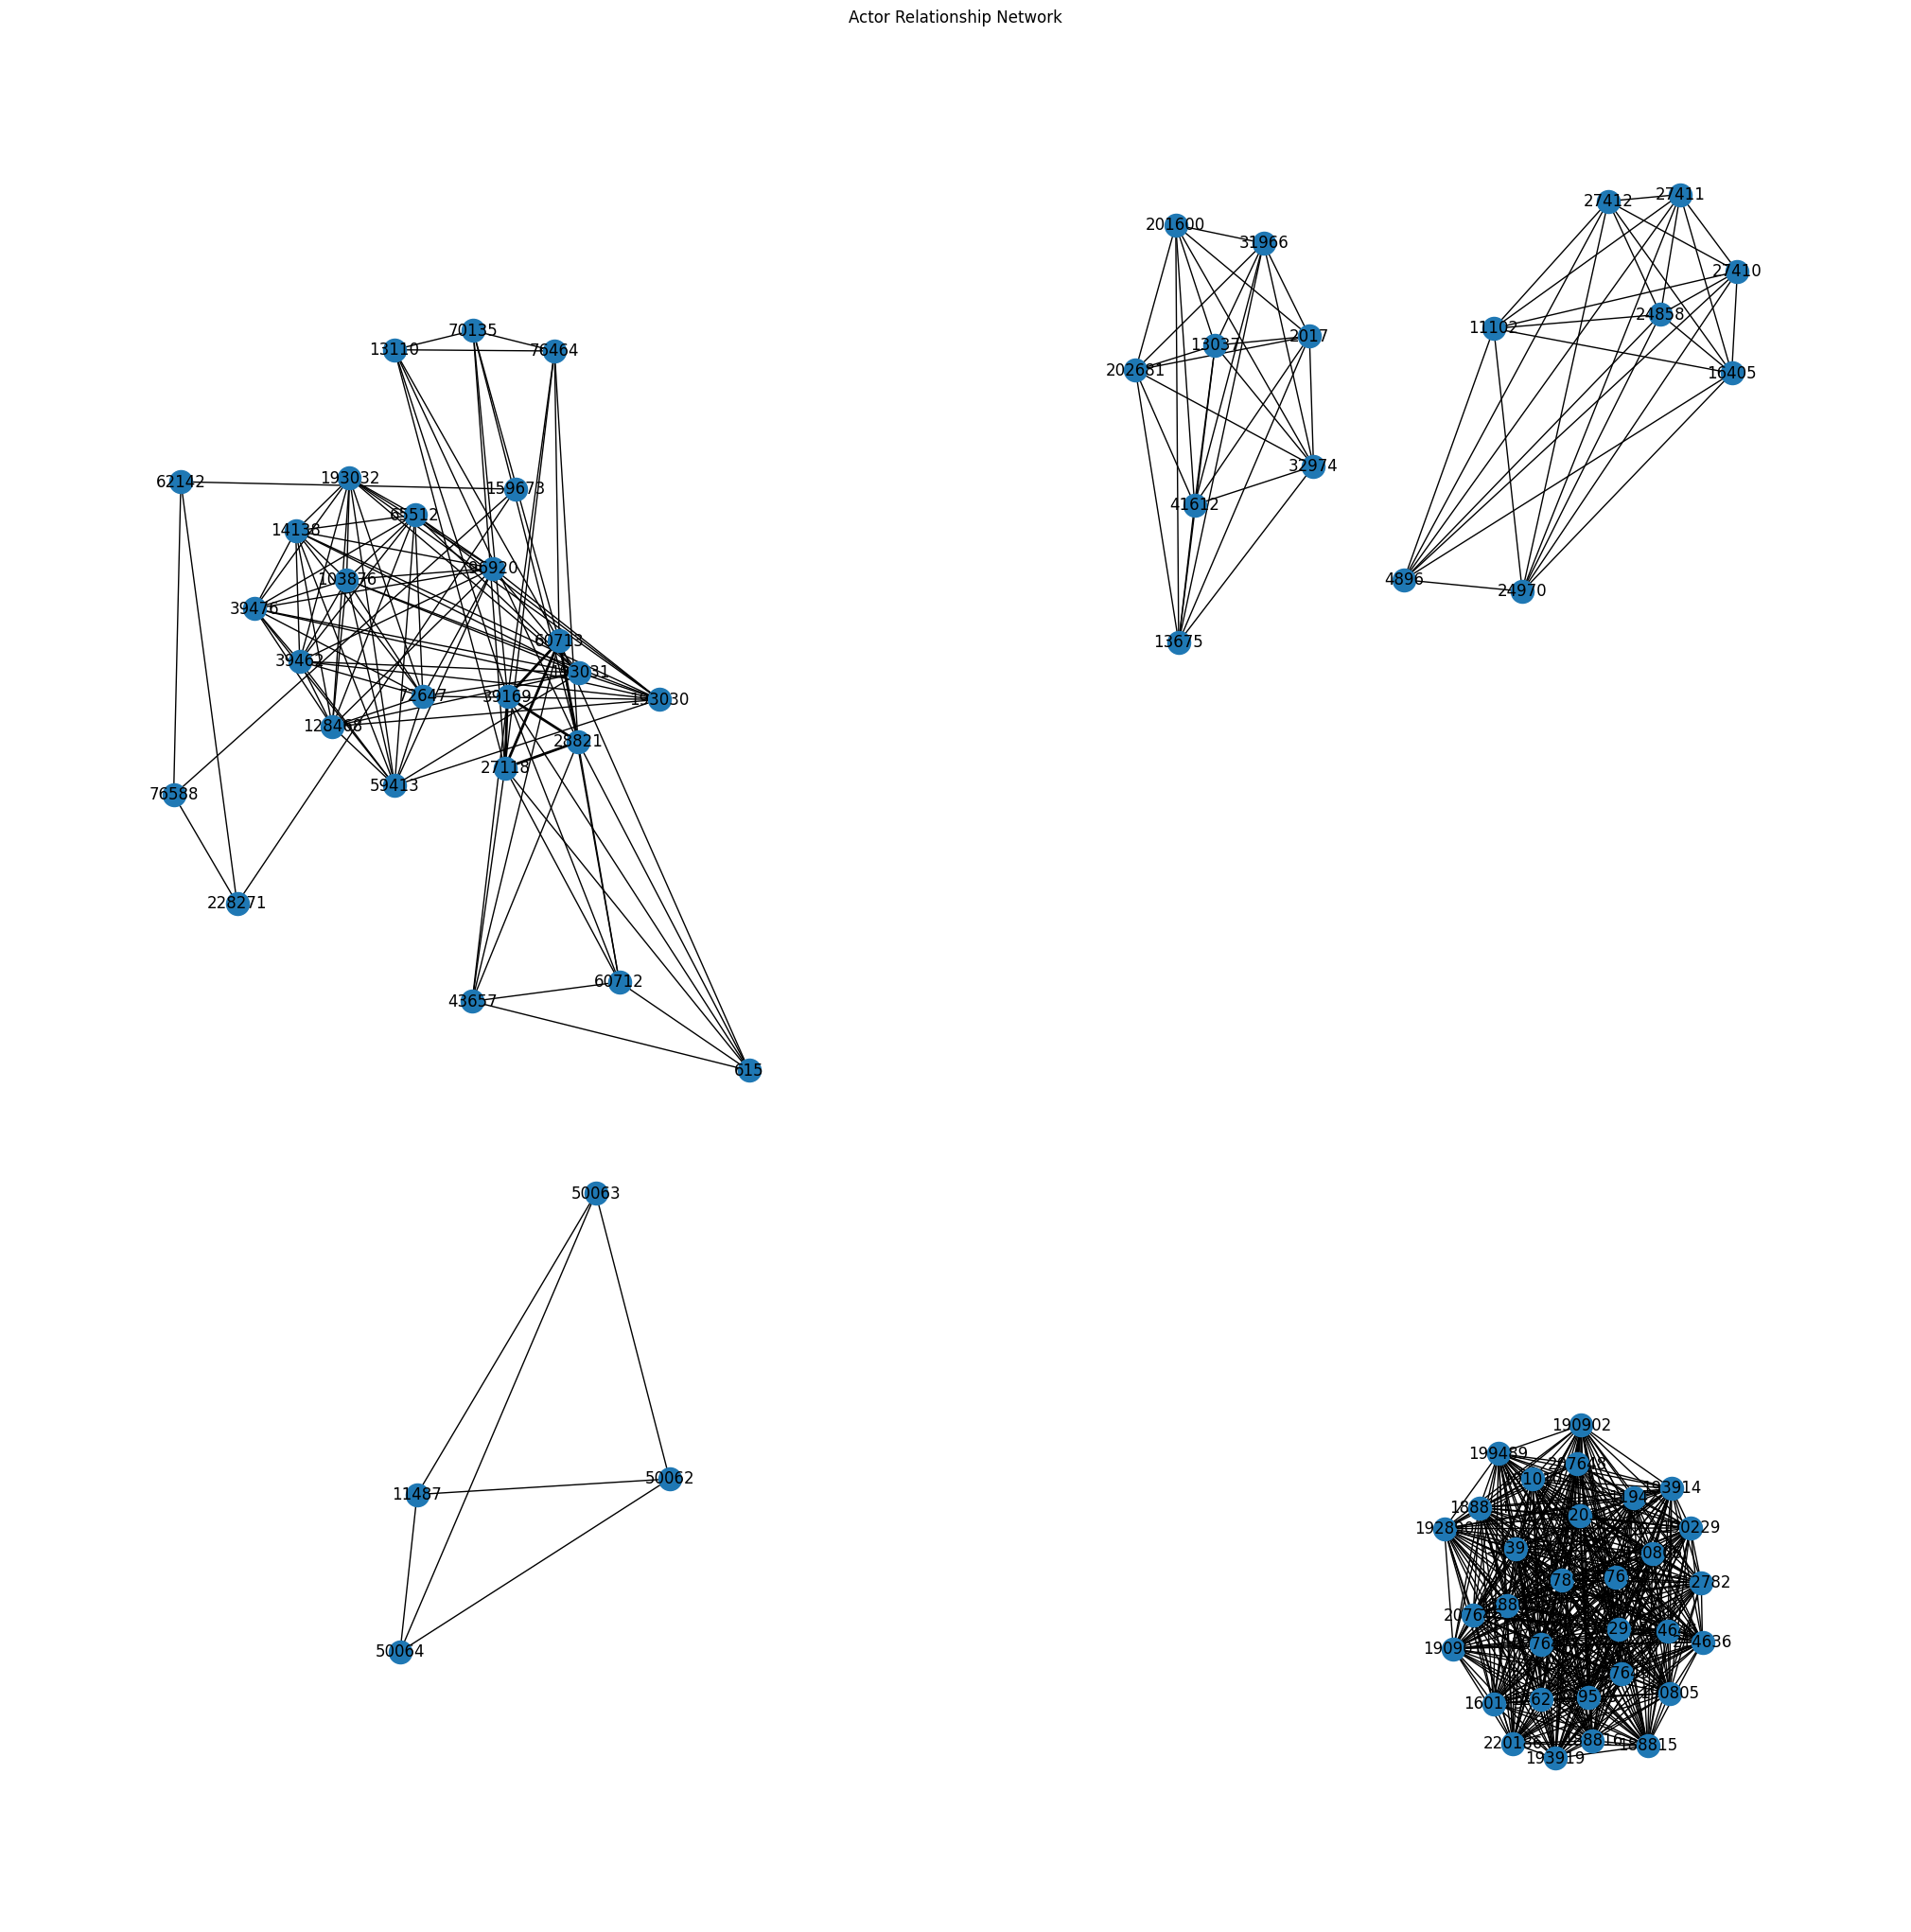

In [25]:
network = nx.Graph()

# Add the actors to the network as nodes and the relations between actors as edges
for actor in graph:
    network.add_node(actor.id, name=actor.name)
    for x, y in actor.related_actors.items():
        network.add_edge(actor.id, x, weight=y)

# Use spring layout for better node distribution
pos = nx.spring_layout(network, k=0.5, iterations=50)

# Get the edge weights
weights = list(nx.get_edge_attributes(network, 'weight').values())


plt.figure(figsize=(20, 20))
nx.draw(network, pos, 
        with_labels=True,  
        width=weights,
        )

plt.title("Actor Relationship Network")
# The visibility of this graph is not great but this was the best I could do with help from the docs (and some AI)
plt.show()

In [26]:
# Return the color of the edge based on the weight
def get_edge_color(weight):
    # Since only the top 4 actors have an influence score greater than 1, there is only one case to check for
    if weight>1:
        return 'red'
    else:
        return 'black'


In [27]:
# Return the color of the node based on the influence score
def get_node_color(weight):
  # Again, since only the top 4 actors have an influence score greater than 1 due to the influence score being the average of the weights, there is only one case to check for
  if weight>1:
    return 'red'
  else:
    return 'cyan'

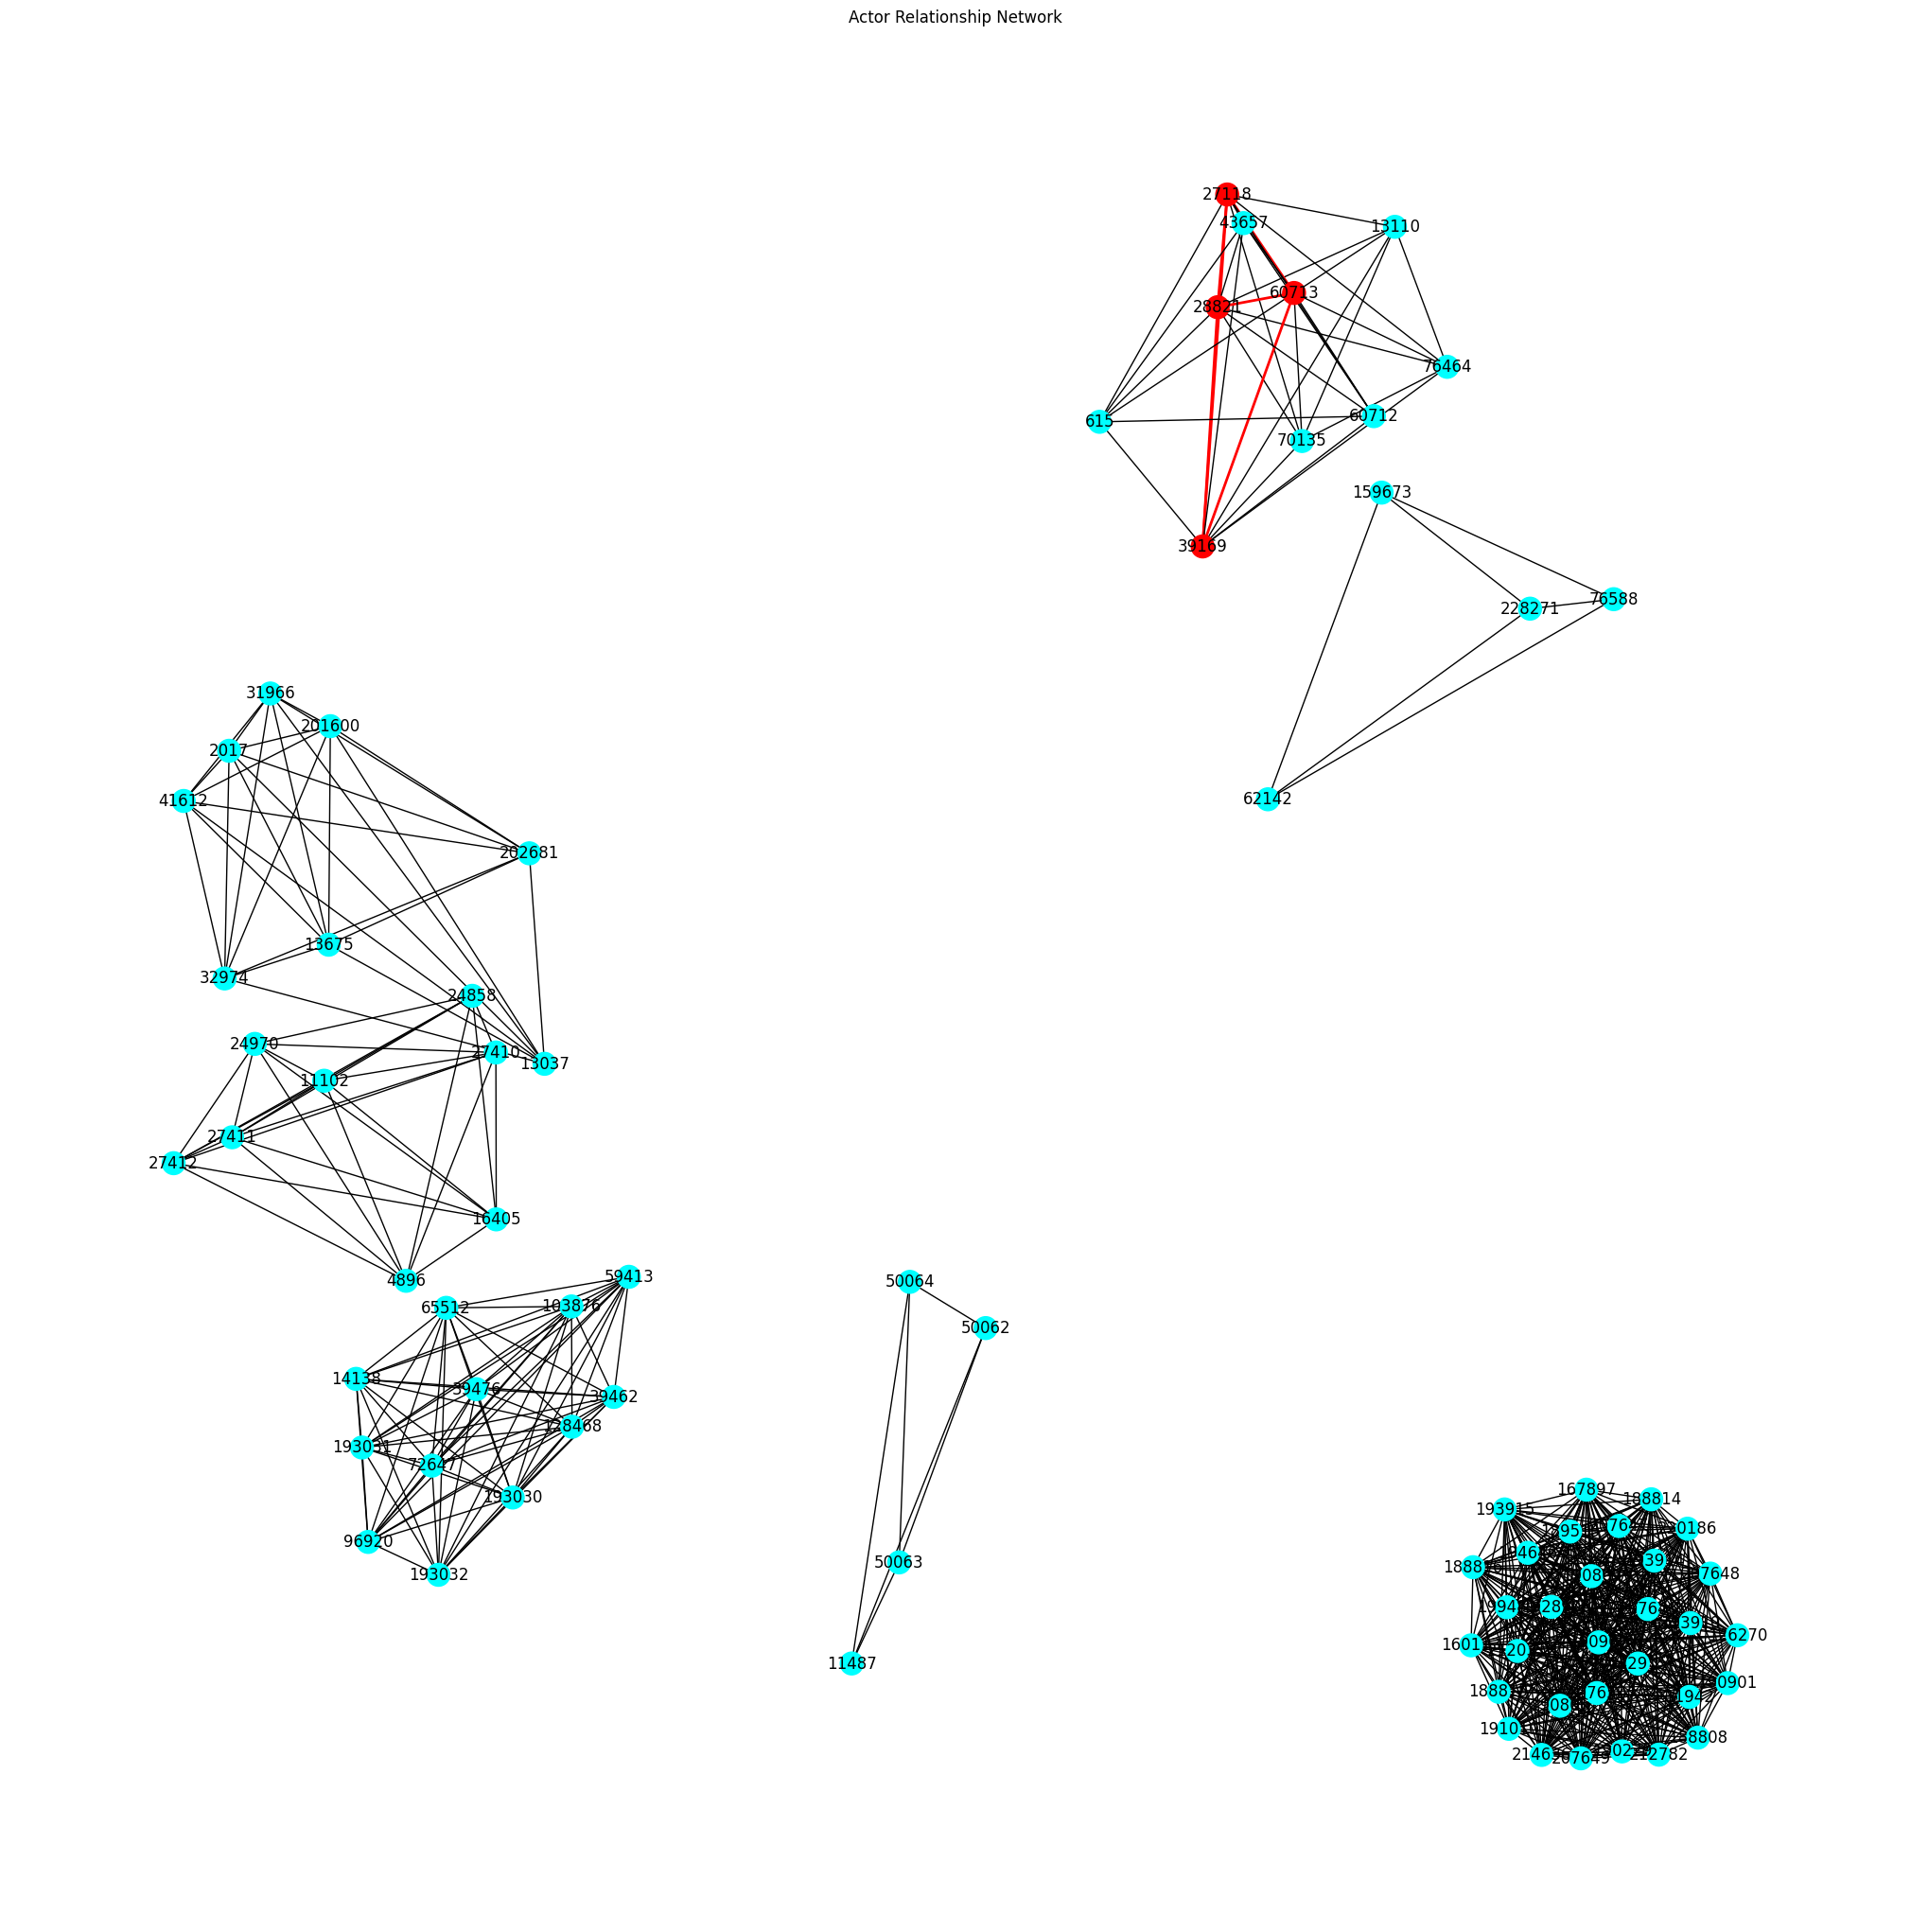

In [28]:
# Recreate the network but with the new colors
for actor in graph:
    network.add_node(actor.id, name=actor.name)
    for x, y in actor.related_actors.items():
        network.add_edge(actor.id, x, weight=y)

pos = nx.spring_layout(network, k=0.5, iterations=50)

weights = list(nx.get_edge_attributes(network, 'weight').values())

node_colors = [get_node_color(actor.compute_influence()) for actor in graph]
edge_colors = [get_edge_color(weight) for weight in weights]

plt.figure(figsize=(20, 20))
nx.draw(network, pos, 
        with_labels=True,  
        width=weights,
        node_color=node_colors,
        edge_color=edge_colors,
        )

plt.title("Actor Relationship Network")
plt.show()